In [21]:
import numpy as np
import cv2
import time
import matplotlib.pyplot as plt
%matplotlib inline
def draw_points(img, pts, color=(0, 0, 255)):
    img_with_pts = img.copy()
    for pt in pts:
        cv2.circle(img_with_pts, tuple(pt.astype(int)), 5, color, -1)
    return img_with_pts

In [22]:
import numpy as np
import cv2
import time
import matplotlib.pyplot as plt
%matplotlib inline

# TODO 1 (15%): Implement calc_homography()
def calc_homography(pts_src, pts_dst):
  # enter your code here, and remove the following line
  A = []
  for i in range(4):
    a, b = pts_src[i]
    c, d = pts_dst[i]
    A.append([-a, -b, -1, 0, 0, 0, c*a, c*b, c])
    A.append([0, 0, 0, -a, -b, -1, d*a, d*b, d])
    
    
  A = np.array(A, dtype=np.float64) #The matrix A in page 11 should be of dtype=np.float64.
  
  
  #SVD公式 
  # A^t * A = U * D * U^t
  #>>
  # A = V * S * Ut
  _, _, ut = np.linalg.svd(A) #我們只需要用到ut
  H = ut[-1].reshape((3, 3)) #Let h ∈ R9 be the last column of U.
  return H 


In [23]:
img_src = cv2.imread("monet.jpg")
img_dst = cv2.imread("painting.jpg")
ht_src, wid_src, _ = img_src.shape
ht_dst, wid_dst, _ = img_dst.shape
pts_src = np.array([    [0,0],[wid_src, 0],[wid_src,ht_src], [0,ht_src]])
pts_dst = np.array([[299,515],  [1776,360],     [1680,1834], [239,1615]])
print('source_shape:', ht_src, wid_src)
print('destination_shape:', ht_dst, wid_dst)

H = calc_homography(pts_src, pts_dst)
H = H/H[2,2]
print(H)

source_shape: 902 1457
destination_shape: 2163 2089
[[ 7.02993983e-01 -6.43991704e-02  2.99000000e+02]
 [-1.69369368e-01  1.23383553e+00  5.15000000e+02]
 [-1.74962192e-04  8.86893969e-06  1.00000000e+00]]


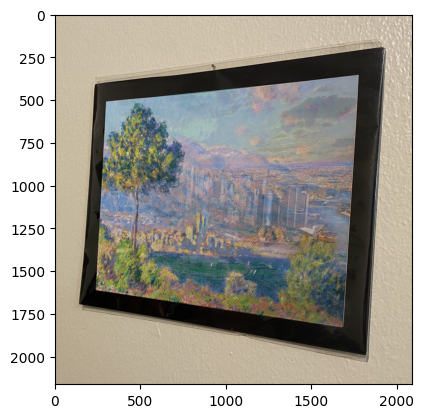

In [24]:
# TODO 2 (10%): Project the source image on the frame
#         formed by v1, v2, v3, and v4 in the target image via direct mapping.

H = calc_homography(pts_src, pts_dst)

CCopy = img_dst.copy() #複製一個和target大小相同的圖像空間

for j in range(ht_src):
    for i in range(wid_src): #兩個for對於每一個像素
        #轉換為homogeneous coordinates
        p = np.array([i, j, 1]) 
        #Use the homography matrix H to project (i,j)
        proj = H @ p 
        #denote the result by (x, y)
        x, y = proj[:2] / proj[2]
        x, y = int(x), int(y)
        if 0 <= y < ht_dst and 0 <= x < wid_dst:
            CCopy[y, x] = img_src[j, i] #[row, column]
            
            
plt.imshow(cv2.cvtColor(CCopy, cv2.COLOR_BGR2RGB))
plt.show()




# Display the projection result.

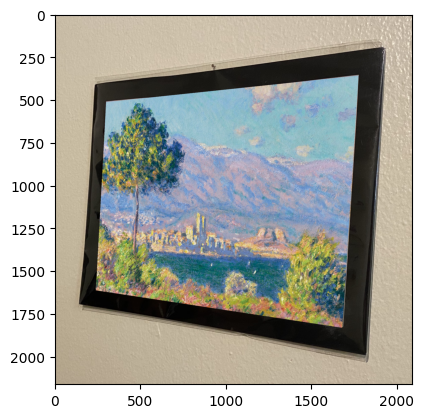

In [25]:
# TODO 3 (20%): Project the source image on the frame
#         formed by v1, v2, v3, and v4 in the target image via inverse mapping.


G = calc_homography(pts_dst, pts_src) #講義的寫法
# G = np.linalg.inv(H) #我的寫法
result = img_dst.copy()


img_poly = np.zeros_like(img_dst) #定義一個shape和img_dst大小一樣

# cv2.fillPoly(img_poly, [pts_dst[0], pts_dst[1], pts_dst[2], pts_dst[3]], (1, 1, 1))

region = np.array([pts_dst[0], pts_dst[1], pts_dst[2], pts_dst[3]])
cv2.fillPoly(img_poly, [region], (1, 1, 1))




for j in range(ht_dst):
    for i in range(wid_dst):
        # if img_poly[j, i] > 0 :    #The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()
        if img_poly[j, i].any():
            p = np.array([i, j, 1])
            p_proj = G @ p
            x, y = p_proj[:2] / p_proj[2]
            x, y = int(x), int(y)
            
            
            if y < ht_src and x < wid_src:
                result[j, i] = img_src[y, x] #Copy the pixel of the source image at (xx, yy) to the pixel of the target imag at (ii,jj).
                
                
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()





# Display the projection result.

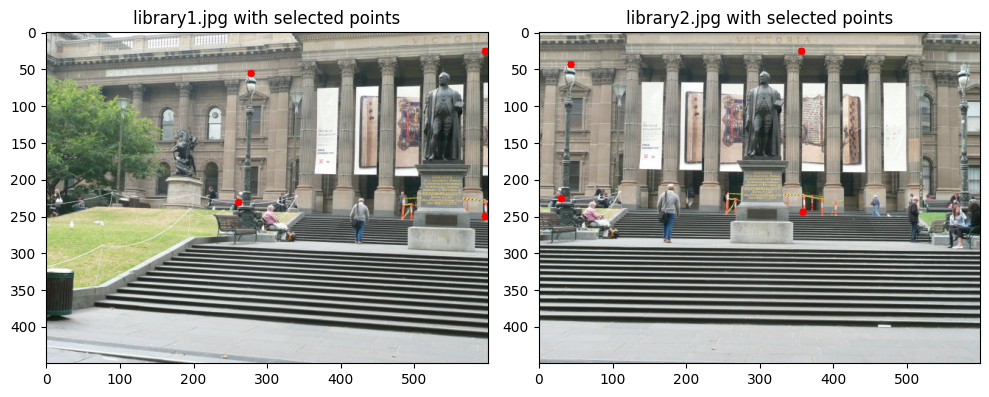

In [26]:
# TODO 4 (10%): Select key points in library1.jpg and library2.jpg.
# Display the selected points in library1.jpg/library2.jpg as shown in assignment3.pdf
img_dst = cv2.imread("library1.jpg")
img_src = cv2.imread("library2.jpg")
# enter the coordinates of the selected points below (Both pts_dst and pts_src are of shape (4,2).)
# pts_dst = ...
# pts_src = ...
# enter your code here

# after i excute get_mouse_click.ipynb
# in p1
# left top : 278, 57
# left down : 261, 232
# right top : 591, 27
# right down : 596, 251

# in p2
# left top : 43, 45
# left down : 30, 227
# right top : 359, 35
# right down : 358, 245

pts_dst = np.array([[278, 57], [596, 27], [596, 251], [261, 232]])  
pts_src = np.array([[43, 45], [356, 27], [358, 245], [30, 227]])


#畫出 p1 p2 包含點點
img_dst_with_pts = draw_points(img_dst, pts_dst)
img_src_with_pts = draw_points(img_src, pts_src)

plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(cv2.cvtColor(img_dst_with_pts, cv2.COLOR_BGR2RGB)), plt.title('library1.jpg with selected points')
plt.subplot(122), plt.imshow(cv2.cvtColor(img_src_with_pts, cv2.COLOR_BGR2RGB)), plt.title('library2.jpg with selected points')
plt.tight_layout()
plt.show()


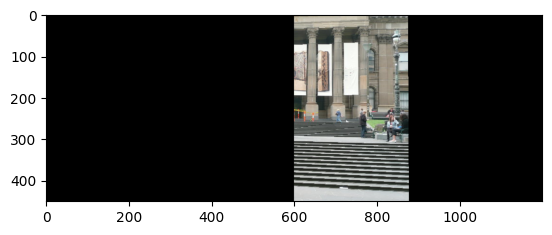

In [27]:
# TODO 5 (20%): Warping library2.jpg to create img_warp.

H = calc_homography(pts_dst, pts_src)
ht_src, wid_src, _ = img_src.shape #l2
# print(ht_src,wid_src,"************")
ht_dst, wid_dst, _ = img_dst.shape #l1
# print(ht_dst,wid_dst,"************")





img_canvas = np.zeros((ht_dst, wid_dst+wid_src, 3), dtype=np.uint8)




G = np.linalg.inv(H)


for j in range(ht_dst):
    for i in range(wid_dst,wid_src+wid_dst):
        p = np.array([i, j, 1])
        p_proj = H @ p
        x, y = p_proj[:2] / p_proj[2]
        x, y = int(x), int(y)
        if 0 <= y < ht_src and 0 <= x < wid_src:
            img_canvas[j, i] = img_src[y, x]

        


            
           
            
img_warp = img_canvas.copy()
plt.imshow(cv2.cvtColor(img_warp, cv2.COLOR_BGR2RGB))
plt.show()



# Display the warped result.

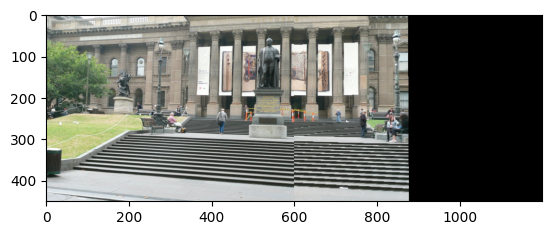

In [28]:
# TODO 6 (5%): Stitching library1.jpg and img_warped.


img_stitched = img_warp.copy()
img_stitched[:ht_dst, :wid_dst] = img_dst
plt.imshow(cv2.cvtColor(img_stitched, cv2.COLOR_BGR2RGB))
plt.show()


# Display the stitched result.

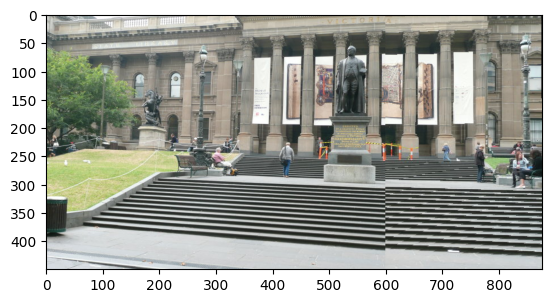

In [29]:
# TODO 7 (10%): Post-processing the stitched result.


img_stitched_final = img_stitched[:, :877]
plt.imshow(cv2.cvtColor(img_stitched_final, cv2.COLOR_BGR2RGB))
plt.show()


 

# Display the final result.

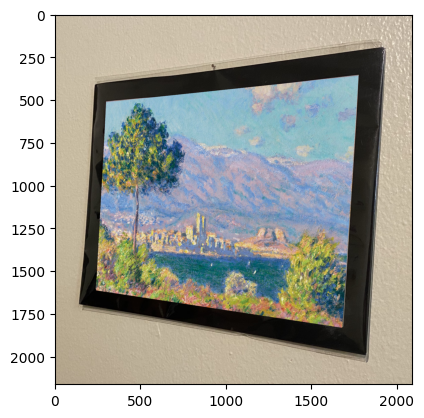

In [30]:
# TODO 8 (10%): Complete the same task as in TODO 3, but without using any for loops.
img_src = cv2.imread("monet.jpg")
img_dst = cv2.imread("painting.jpg")
ht_src, wid_src, _ = img_src.shape
ht_dst, wid_dst, _ = img_dst.shape
pts_src = np.array([    [0,0],[wid_src, 0],[wid_src,ht_src], [0,ht_src]])
pts_dst = np.array([[299,515],  [1776,360],     [1680,1834], [239,1615]])
# enter your code here

H = calc_homography(pts_src, pts_dst)
result = img_dst.copy()
img_poly = np.zeros_like(img_dst, dtype=np.uint8)
roi_poly = np.array([pts_dst[0], pts_dst[1], pts_dst[2], pts_dst[3]], dtype=np.int32)
cv2.fillPoly(img_poly, [roi_poly], (1, 1, 1))

G = np.linalg.inv(H)
roi_dst = np.argwhere(img_poly > 0)
roi_dst = np.vstack((roi_dst[:, 1], roi_dst[:, 0], np.ones(len(roi_dst))))
roi_src = G @ roi_dst
roi_src = roi_src[:2] / roi_src[2]
idx = (0 <= roi_src[0]) & (roi_src[0] < wid_src) & (0 <= roi_src[1]) & (roi_src[1] < ht_src)
result[roi_dst[1, idx].astype(int), roi_dst[0, idx].astype(int)] = img_src[roi_src[1, idx].astype(int), roi_src[0, idx].astype(int)]
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()


